<a href="https://colab.research.google.com/github/yasamankfd/2-functions-With-Thread/blob/master/test_NN_on_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow numpy matplotlib pillow


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and prepare the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 [==============================] - 3s 0us/step


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [6]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.5018 - accuracy: 0.4549 - val_loss: 1.2857 - val_accuracy: 0.5464
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1505 - accuracy: 0.5936 - val_loss: 1.0698 - val_accuracy: 0.6225
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0044 - accuracy: 0.6488 - val_loss: 1.0601 - val_accuracy: 0.6285
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9053 - accuracy: 0.6815 - val_loss: 0.9195 - val_accuracy: 0.6792
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8323 - accuracy: 0.7076 - val_loss: 0.9485 - val_accuracy: 0.6666
Epoch 6/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.7641 - accuracy: 0.7325 - val_loss: 0.8730 - val_accuracy: 0.6964
Epoch 7/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.7152 - accuracy: 0.7473 - val_loss: 0.8573 -

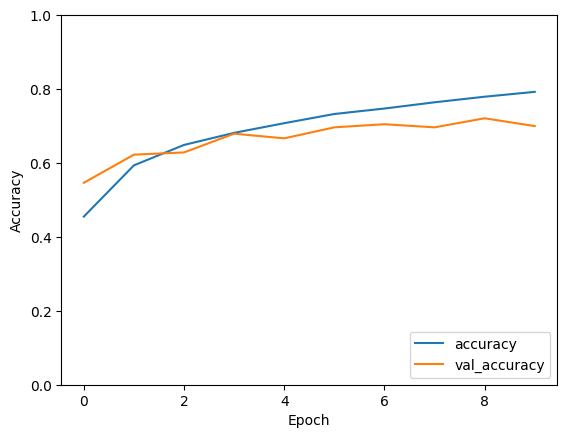

313/313 - 4s - loss: 0.9384 - accuracy: 0.6998 - 4s/epoch - 12ms/step
Test accuracy: 0.6998000144958496


In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


In [13]:
model.save('cifar10_cnn_model.h5')


In [14]:
import numpy as np
from PIL import Image
import os,sys
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive")
img_path = '/content/drive/My Drive/images.jpg'
# Load a single image and preprocess it
def load_image(img_path):
    img = Image.open(img_path)
    img = img.resize((32, 32))  # Resize the image to match the input shape of the model
    img = np.array(img)
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    return img

# Predict the class of the image
def classify_image(model, img_path):
    img = load_image(img_path)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions[0])
    return class_names[predicted_class]

# Load the saved model
model = tf.keras.models.load_model('cifar10_cnn_model.h5')

# Example usage
# img_path = 'path_to_your_image.jpg'  # Replace with the path to your image
print(f'This image is a {classify_image(model, img_path)}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 153ms/step
This image is a dog
